<center><h1> TP 1 : HMM</h1></center>

<h3>DONE BY : MEJRI AYMEN</h3>

## Question 0:

We have : $v_i<0 $  $\forall i \in \{1..l\} $ </br> Let $V_{max}= max_i(v_i)$ so :
$\sum_{i=1}^{L} \exp{v_i} =\log(\sum_{i=1}^{L} \exp({v_i+v_{max}-v_{max}}))$


$\sum_{i=1}^{L} \exp{v_i} =\log(\sum_{i=1}^{L} \exp({v_i-v_{max}})\exp(v_{max}))$

so : $$\sum_{i=1}^{L} \exp{v_i} =v_{max}+\log(\sum_{i=1}^{L} \exp({v_i-v_{max}}))$$

Let $V_{i_0}=V_{max}$, then:
$$\sum_{i=1}^{L} \exp{v_i} =v_{max}+\log(1+\sum_{i=1,i\ne i_0}^{L} \exp({v_i-v_{max}}))$$

we can see that:  $1+\sum_{i=1,i\ne i_0}^{L} \exp({v_i-v_{max}}) > 1$
then : $\sum_{i=1}^{L} \exp{v_i}>V_{max}$ and that's why it should work.

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [3]:
def log_sum_exp(v_i):
    """
    v_i : a vector of v_i values
    """
    v_max=np.max(v_i)
    return v_max+np.log(np.sum(np.exp(v_i-v_max)))

In [4]:
v_i=[-1234,-1235]
log_sum_exp(v_i)

-1233.6867383124818

In [5]:
np.log(np.sum(np.exp(v_i)))

C:\Users\mejri aymen\Anaconda33\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

We can see that with applying the classical function we obtain $-\infty$ which is wrong.

## Question 1 :

#### 1)  Choose the appropriate random variables, define their domains, write down the generative model and draw the associated directed graphical model.

Let $X_i$ be the latent state (the true position) and $Y_i$ the observation $\forall i \in \{1..K\}$
<br>We have :</br>
<br>For $X_i \in \{1..N\}$ : $ X_i \sim p(X_i|X_{i-1})$ (Transition model)</br>
<br>For $Y_i \in \{1..N\}$ : $ Y_i \sim p(Y_i|X_{i})$ (Observation model)</br>



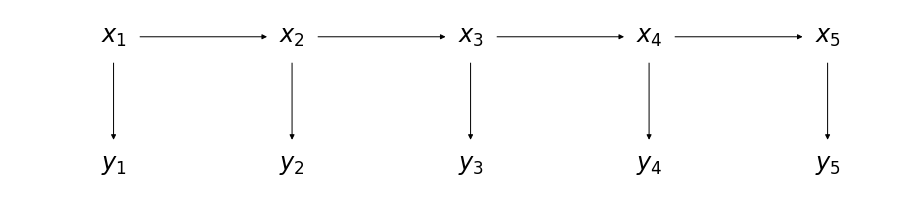

In [6]:
def makeDBN(inter, intra, T, labels):
    """Unfold a graph for T time slices"""
    N = max(max([i for i,j in inter]),max([j for i,j in inter]))+1

    G = np.zeros((N*T,N*T))
    pos = []
    all_labels = []
    for n in range(N):
        pos.append((0,-n))
        all_labels.append('$'+labels[n]+'_{'+str(0+1)+"}"+'$')
        
    for e in inter:
        s,d = e
        G[s,d] = 1

    for t in range(1,T):
        for n in range(N):
            pos.append((t,-n))
            all_labels.append('$'+labels[n]+'_{'+str(t+1)+"}"+'$')

        for e in inter:
            s,d = e
            s = s + N*t
            d = d + N*t
            G[s,d] = 1
        
        for e in intra:
            s,d = e
            s = s + N*(t-1)
            d = d + N*t
            G[s,d] = 1
    return G,pos,all_labels

#inter = [(0,1),(1,2),(2,3)]
#intra = [(0,0),(1,1),(0,1),(0,2)]
#variable_names = ["r","z","x", "y"] 
inter = [(0,1)]
intra = [(0,0)]
variable_names = ["x", "y"] 
T = 5

A, pos, label_list = makeDBN(inter, intra, T, variable_names)

G = nx.DiGraph(A)
labels = {i: s for i,s in enumerate(label_list)}
plt.figure(figsize=(12,2.5))
nx.draw(G, pos, node_color="white", node_size=2500, labels=labels, font_size=24, arrows=True)
#nx.draw_graphviz(G,node_size=500, labels=labels, font_size=24, arrows=True)
plt.show()

### 2) Define the conditional probability tables (i.e., the transition model and the observation model) given the verbal description above.

The initial position of the robot is unknown and assumed to be uniformly distributed. Let U be the initial vector . so : </br> 
$U=\frac{1}{N}[1...1]$ with N the number of possible locations.

#### State transition model :

It's the matrix that represent the probability of $X_t|X_{t-1}$ : $ p(X_t|X_{t-1})$
$$A = \quad
\begin{bmatrix} 
\epsilon & 1-\epsilon & 0 & . & . & . & 0 \\
0 & \epsilon & 1-\epsilon & . & . & . & 0 \\
0 & 0 & \epsilon & 1-\epsilon & . & . & 0 \\
0 & 0 & 0 & \epsilon  & . & . & 0\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&1-\epsilon\\
1-\epsilon & . &.&.&0 & 0&\epsilon
\end{bmatrix}$$
Where $\epsilon$ is the probability that the robot stays where it is.

$\forall i,j \in \{1..N\}$ $  p(X_t=i|X_{t-1}=j)=A_{i,j}$

**State observation model:**

It's the matrix that shows the probability of $Y_t|X_t$ : $ p(Y_t|X_{t})$
$$O = \quad
\begin{bmatrix} 
\omega + \frac{(1-\omega)}{N}& \frac{(1-\omega)}{N} & . & . & . & . & \frac{(1-\omega)}{N} \\
\frac{(1-\omega)}{N}& \omega +\frac{(1-\omega)}{N}& \frac{(1-\omega)}{N} & . & . & . & \frac{(1-\omega)}{N} \\
\frac{(1-\omega)}{N}& \frac{(1-\omega)}{N} & \omega+\frac{(1-\omega)}{N} & \frac{(1-\omega)}{N}& . & . & \frac{(1-\omega)}{N} \\
\frac{(1-\omega)}{N} & . &\frac{(1-\omega)}{N} & \omega +\frac{(1-\omega)}{N} & \frac{(1-\omega)}{N} & . & \frac{(1-\omega)}{N}\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
\frac{(1-\omega)}{N}& . &.&.&\frac{(1-\omega)}{N}&\frac{(1-\omega)}{N}&\omega+\frac{(1-\omega)}{N}
\end{bmatrix}$$
Where $\omega$ is the probability that the robot observes its true position.

### 3) Specify the following verbal statements in terms of posterior quantities using mathematical notation.

**a)Distribution of the robot's current position given the observations so far**

$p(X_k|Y_{1..k})$ 


**b)Distribution of the robot's position at time step k given all the observations** 

$p(X_k|Y_{1..K})$ 

**c)Distribution of the robot's next position given the observations so far** 

$p(X_{k+1}|Y_{1..k})$ 

**d)Distribution of the robot's next sensor reading given the observations so far**

$p(Y_{k+1}|Y_{1..k})$ 

**e)Distribution of the robot's initial position given observations so far** 

$p(X_1|Y_{1..k})$ 

**f)Most likely current position of the robot given the observations so far** 

$argmax_{X_k}(p(X_k|Y_{1..k}))$ 

**g)Most likely trajectory taken by the robot from the start until now given the observations so far.** 

$argmax_{X_{1..k}}(p(X_{1..k}|Y_{1..k}))$ 



### 4) Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robot and the associated sensor readings. Simulate a scenario for k = 1,...,100 with N = 50, $\epsilon$ = 0.3, $\omega$ = 0.8

In [7]:
N=50
K=100
epsilon=0.3
w=0.8

In [8]:
def generate_matrix(N,epsilon=0.3,w=0.8):
    Trans_matrix=epsilon*np.eye(N)
    for i in range(N-1):
        Trans_matrix[i,i+1]=1-epsilon
    Trans_matrix[N-1,0]=1-epsilon
    Obsmatrix=w*np.eye(N)+np.ones(N)*((1-w)/float(N))

    prior=np.ones(N)/N
    return Trans_matrix,Obsmatrix,prior


In [9]:
Trans_matrix,Obsmatrix,prior=generate_matrix(N=N,epsilon=epsilon,w=w)

In [10]:
def hmm_generate_data(K,N,epsilon,w,Trans_matrix,Obsmatrix,prior):
    state=np.zeros(K,dtype=int)
    obs=np.zeros(K)
    for k in range(K):
        if k==0:
            state[k]=int(np.random.choice(np.arange(0, N), p=prior))
        else:
            state[k]=np.random.choice(np.arange(0, N), p=Trans_matrix[:,state[k-1]])
        obs[k]=np.random.choice(np.arange(0, N), p=Obsmatrix[:,state[k]])
    return obs,state

In [11]:
obs,state = hmm_generate_data(100,N,0.5,0.3,Trans_matrix,Obsmatrix,prior)

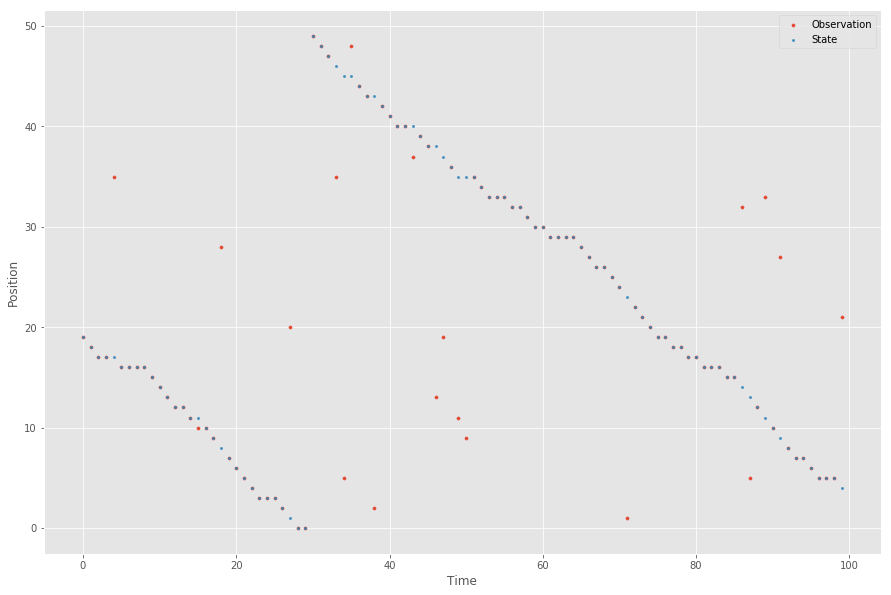

In [12]:
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(np.arange(100),obs,label='Observation',s=10,marker='o')
plt.scatter(np.arange(100),state,label='State',marker='.',s=20)
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

**Simulation :**

In [13]:
for i in range(K):
    print("At step "+str(i)+"(true position["+str(i)+"],observed position["+str(i)+"])= ("+str(state[i])+","+str(int(obs[i]))+")")

At step 0(true position[0],observed position[0])= (19,19)
At step 1(true position[1],observed position[1])= (18,18)
At step 2(true position[2],observed position[2])= (17,17)
At step 3(true position[3],observed position[3])= (17,17)
At step 4(true position[4],observed position[4])= (17,35)
At step 5(true position[5],observed position[5])= (16,16)
At step 6(true position[6],observed position[6])= (16,16)
At step 7(true position[7],observed position[7])= (16,16)
At step 8(true position[8],observed position[8])= (16,16)
At step 9(true position[9],observed position[9])= (15,15)
At step 10(true position[10],observed position[10])= (14,14)
At step 11(true position[11],observed position[11])= (13,13)
At step 12(true position[12],observed position[12])= (12,12)
At step 13(true position[13],observed position[13])= (12,12)
At step 14(true position[14],observed position[14])= (11,11)
At step 15(true position[15],observed position[15])= (11,10)
At step 16(true position[16],observed position[16])= (

## Question 5 : 

In [14]:
def state_predict(A,log_p):
    mx = np.max(log_p)
    p = np.exp(log_p - mx)
    lpp = np.log(A.dot(p)) + mx
    return lpp

In [15]:
def state_update(obs,log_p):
    return np.log(obs) + log_p

In [16]:
def state_postdict(A,log_p):
    mx = np.max(log_p)
    p = np.exp(log_p - mx);
    lpp = np.log(A.T.dot(p)) + mx;
    return lpp

In [17]:
def forward_backward(N,K,w,epsilon,Trans_matrix,Obsmatrix,prior):
    log_alpha=np.zeros((N,K))
    log_alpha_predict=np.zeros((N,K))
    
    for j in range(0,K):
        if j==0:
            log_alpha_predict[:,j]=np.log(prior)
        else:
            log_alpha_predict[:,j]=state_predict(Trans_matrix,log_alpha[:,j-1])
        
        y,state=hmm_generate_data(K,N,epsilon,w,Trans_matrix,Obsmatrix,prior)
        log_alpha[:,j]=state_update(Obsmatrix[int(y[j]),:],log_alpha_predict[:,j])
        
    
    log_beta=np.zeros((N,K))
    log_beta_postdict=np.zeros((N,K))
    for i in range(K-1,-1,-1):
        if i==K-1 :
            log_beta_postdict[:,i] = np.zeros(N)
        else:
            log_beta_postdict[:,i] = state_postdict(Trans_matrix, log_beta[:, i+1])
        log_beta[:,i]=state_update(Obsmatrix[int(y[i]),:],log_beta_postdict[:,i])
    
    return log_alpha,log_alpha_predict,log_beta,log_beta_postdict
        


In [18]:
log_alpha,log_alpha_predict,log_beta,log_beta_postdict=forward_backward(N=50,K=100,w=0.5,epsilon=0.3,Trans_matrix=Trans_matrix,Obsmatrix=Obsmatrix,prior=prior)

#### Calcul de l'expression de la question 3.a:

The expression of the probability : <br>
$P(X_k|Y_{1:k})= \frac{P(X_k,Y_{1:k})}{P(Y_{1:k})}=\frac{P(X_k,Y_{1:k})}{\sum\nolimits_{X_k}P(X_k,Y_{1:k})}=\frac{\alpha_{k,k}(X_k)}{\sum\limits_{i=1}^k \alpha_{k,k}(X_k) } $</br>

In [19]:
def Q_3_a(k,log_alpha):
    alpha =np.exp(log_alpha)
    return alpha[:,k-1]/np.sum(alpha[:,k-1])


In [20]:
## Let's take the current position k = 20 as an example : 
k=20
q3a=Q_3_a(k,log_alpha)

In [21]:
print("Question 3.a : The distribution of the robot's current position ,equal to "+str(k)+" ,given the observations so far is : \n",q3a)

Question 3.a : The distribution of the robot's current position ,equal to 20 ,given the observations so far is : 
 [1.48565493e-04 4.85249533e-05 2.11999971e-05 3.30187828e-05
 4.71664161e-05 4.85654322e-05 3.67915884e-05 4.01369658e-03
 1.88663709e-02 4.05212956e-02 5.23151508e-02 4.51468057e-02
 2.74027073e-02 1.19914832e-02 7.68334721e-01 8.93598548e-04
 8.78125830e-03 3.72450510e-03 1.08367580e-05 3.60670603e-04
 7.65483889e-04 7.24630020e-04 4.55660061e-04 2.45618759e-04
 2.80600484e-04 5.45101726e-04 6.65543452e-04 4.74680212e-04
 2.05874827e-04 5.45682148e-05 8.77336635e-06 2.06423976e-06
 3.53721522e-06 5.88919940e-06 6.94351565e-06 6.21772098e-06
 6.23565115e-06 1.40473091e-05 3.78302591e-05 7.58531437e-05
 1.10625497e-04 1.21410055e-04 1.03116957e-04 4.70554385e-03
 4.01278266e-03 1.68037346e-03 1.05151187e-03 4.53731951e-04
 2.00205549e-04 2.28611542e-04]


#### Calcul de l'expression de la question 3.b:

**3.b** The Distribution of the robot's position at time step k given all the observations is given by

</br> 

$P(X_k|Y_{1:K})= \frac{P(X_k,Y_{1:K})}{P(Y_{1:K})}=\frac{P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k,Y_{1:k})}{P(Y_{1:K})} $

but we know that $y_{k+1:K} \perp  y_{1:k} | X_{k}$ so : <br>

$P(X_k|Y_{1:K})=\frac{P(X_k,Y_{1:k}).P(Y_{k+1:K}|X_k)}{P(Y_{1:K})}=\frac{\gamma_{k,k}(X_k)}{\sum\nolimits_{X_k} \gamma_{k,k}(X_k) }$

</br>

With:
$\gamma_{k,k}(X_k)=\alpha_{k/k}(X_k).\beta_{k/k+1}(X_k) $

In [22]:
def Q_3_b(k,log_alpha,log_beta_postdict):
    gamma=np.exp(log_alpha+log_beta_postdict)
    return gamma[:,k-1]/np.sum(gamma[:,k-1])

In [23]:
## Let's take the current position k = 20 as an example
k=20
q3b=Q_3_b(k,log_alpha,log_beta_postdict)

In [24]:
print("Question 3.b : The distribution of the robot's position at time step k given all the observations is : \n",q3b)


Question 3.b : The distribution of the robot's position at time step k given all the observations is : 
 [5.80710260e-075 8.96898136e-073 3.33086946e-068 2.54460312e-065
 6.29276155e-058 3.44711102e-055 2.25960325e-050 1.09227558e-046
 2.33267299e-044 2.49216366e-039 3.16615864e-036 4.95729682e-031
 5.71502879e-026 1.24277354e-023 3.72279570e-019 3.95252461e-019
 1.85244176e-015 3.66817513e-013 9.81443241e-011 3.10965780e-004
 3.12592827e-001 6.87071498e-001 2.47083067e-005 7.61562617e-010
 6.18770488e-019 3.56663339e-025 4.05402571e-027 3.45466044e-028
 2.10272116e-029 3.24684384e-032 3.17863926e-035 7.82523345e-038
 5.37536826e-051 9.08554457e-053 6.12124224e-057 3.85981512e-068
 2.75304672e-077 2.17308608e-090 9.53934585e-095 9.75333103e-096
 1.31184449e-097 1.10875556e-101 4.49022983e-099 9.57742059e-095
 3.81179261e-092 1.35204056e-089 4.31171381e-087 8.75563175e-085
 1.80387701e-082 1.62421371e-077]


#### Calcul de l'expression de la question 3.f:

$\arg\max_{X_k} P(X_k|Y_{1:k})$

In [26]:
def Q_3_f(k,log_alpha):
    q3a=Q_3_a(k,log_alpha)
    return np.argmax(q3a)

In [27]:
q3f=Q_3_f(k,log_alpha)

In [28]:
print("Question 3.f: The most likely current position of the robot given the observations so far is : \n",q3f)

Question 3.f: The most likely current position of the robot given the observations so far is : 
 14


## Question 6 :

assuming now that at each step the robot can be kidnapped with probability $k$ the transition state model become:
$$A_{kidnapped}=(1-k)A+k
\mathbb{1_N}$$ 

with : $$\mathbb{1_n}= \frac{1}{N} \quad
\begin{bmatrix} 
1 & 1 & . & . & . & . & 1 \\
1 & 1 & . & . & . & . & 1 \\
1 & 1 & . & . & . & . & 1 \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
1 & 1 &.&.& .& .&1
\end{bmatrix}$$

So:

$$\quad
A_{kidnapped}=
\begin{bmatrix} 
(1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & \frac{k}{N} & . & . & . & (1-k)(1-\epsilon)+\frac{k}{N} \\
 \frac{k}{N} & (1-k).\epsilon+\frac{k}{N} & (1-k).(1-\epsilon)+\frac{k}{N} & . & . & \frac{k}{N} \\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
(1-k).(1-\epsilon)+\frac{k}{N} & . &.&.&\frac{k}{N}& \frac{k}{N} &(1-k).\epsilon+\frac{k}{N}
\end{bmatrix}$$a
Concerning the matrix of observed state model, it is still the same as the previous case. that's means that :

$$ O_{kidnapped}= \quad
\begin{bmatrix} 
\omega + \frac{(1-\omega)}{N}& \frac{(1-\omega)}{N} & . & . & . & . & \frac{(1-\omega)}{N} \\
\frac{(1-\omega)}{N}& \omega +\frac{(1-\omega)}{N}& \frac{(1-\omega)}{N} & . & . & . & \frac{(1-\omega)}{N} \\
\frac{(1-\omega)}{N}& \frac{(1-\omega)}{N} & \omega+\frac{(1-\omega)}{N} & \frac{(1-\omega)}{N}& . & . & \frac{(1-\omega)}{N} \\
\frac{(1-\omega)}{N} & . &\frac{(1-\omega)}{N} & \omega +\frac{(1-\omega)}{N} & \frac{(1-\omega)}{N} & . & \frac{(1-\omega)}{N}\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
. & . &.&.&.&.&.\\
\frac{(1-\omega)}{N}& . &.&.&\frac{(1-\omega)}{N}&\frac{(1-\omega)}{N}&\omega+\frac{(1-\omega)}{N}
\end{bmatrix}$$


Here for this question we can reuse the code above. we just have to regenerate the transition matrix and the observation matrix with taking into acounting the fact that at each step the robot can be kidnapped with probability $k$.

In [29]:
def generate_matrix_kinnaped(N,epsilon=0.5,k=0.1,w=0.3):
    Transition=generate_matrix(N,epsilon,w)[0]
    Transition_kidnapped=(1-k)*Transition+(k)/N*np.ones((N,N))
    ObsMatrix_kidnapped=w*np.eye(N)+(1-w)/N*np.ones((N,N))
    prior_knp=np.ones(N)/N
    return Transition_kidnapped,ObsMatrix_kidnapped,prior_knp


In [30]:
Trans_matrix_knp,Obsmatrix_knp,prior_knp=generate_matrix_kinnaped(N=N,epsilon=epsilon,k=0.1,w=w)

In [31]:
obs_knp,state_knp=hmm_generate_data(K,N,epsilon,w,Trans_matrix_knp,Obsmatrix_knp,prior_knp)

In [32]:
log_alpha_knp,log_alpha_predict_knp,log_beta_knp,log_beta_postdict_knp=forward_backward(N,K,w,epsilon,Trans_matrix_knp,Obsmatrix_knp,prior_knp)
q3a_knp=Q_3_a(3,log_alpha_knp)
q3b_knp=Q_3_b(3,log_alpha,log_beta_postdict_knp)
q3f_knp=Q_3_f(3,log_alpha_knp)

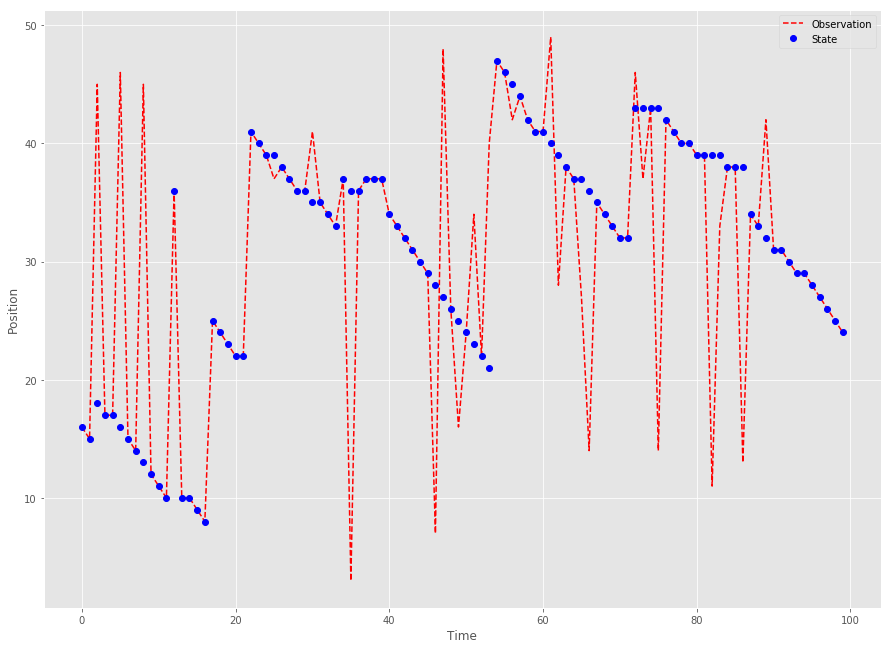

In [33]:
fig = plt.figure(1, figsize=(15, 11))
plt.plot(np.arange(100),obs_knp,'r--',label='Observation')
plt.plot(np.arange(100),state_knp,'bo',label='State')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend()
plt.show()

**Observation:**<br>
here we can see that the robot can be kidnapped from the different gaps in the graph above.